# **PROBLEM STATEMENT**

## ***Multi-Class Image Classification: Comparing the Performance of a Feed-Forward Neural Network (MLP) versus a Convolutional Neural Network (CNN).***

# **DATASET DESCRIPTION**

# **The file is being unzipped and the images and masks path are being defined and the flowers being printed to visualize them.**

In [ ]:
import zipfile
import os
from IPython.display import Image, display
import time
import pandas as pd
import cv2
import re
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from PIL import Image
from IPython.display import Image, display

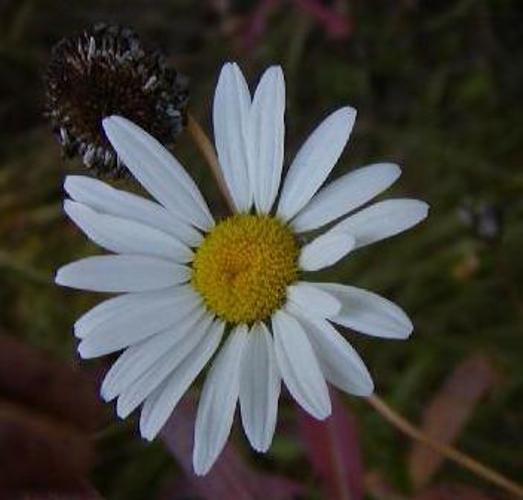

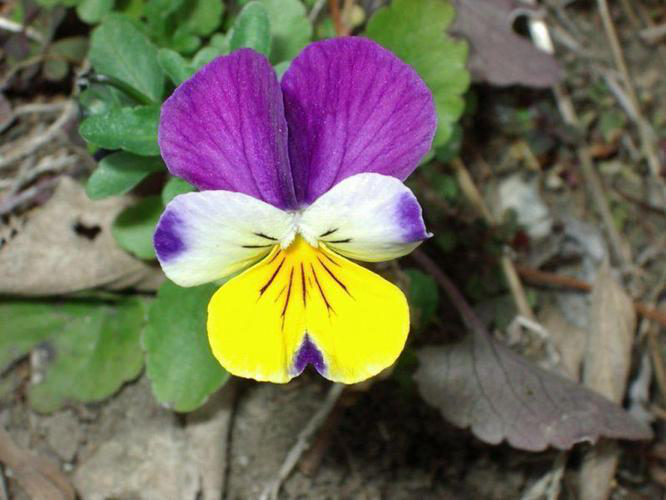

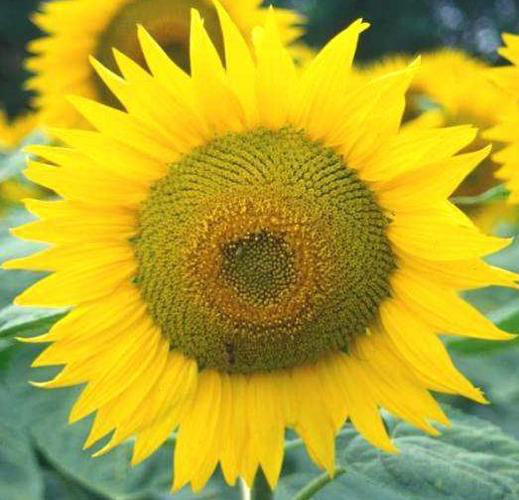

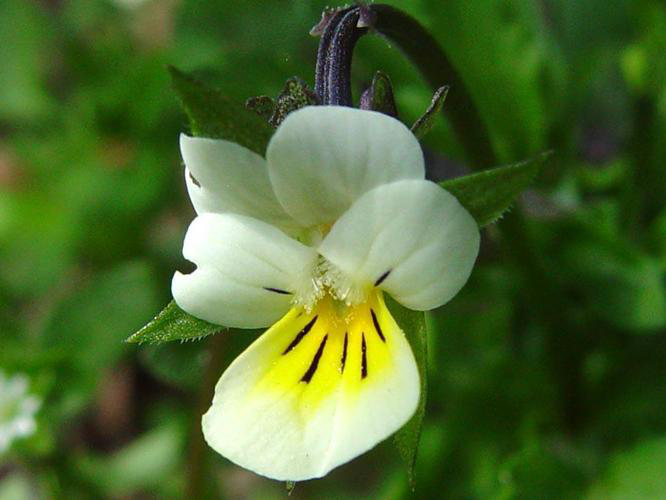

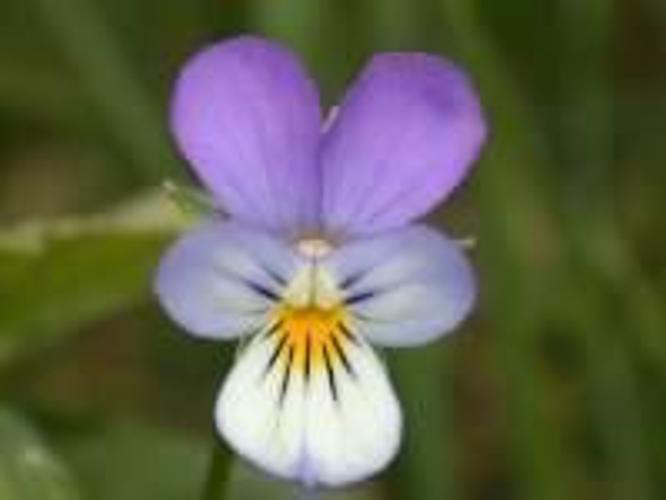

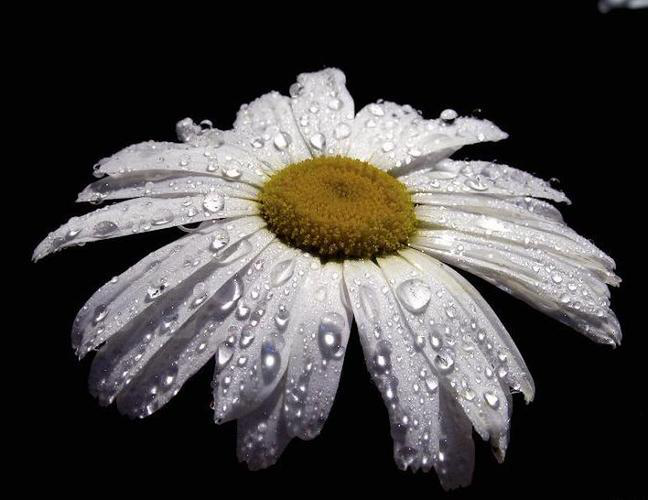

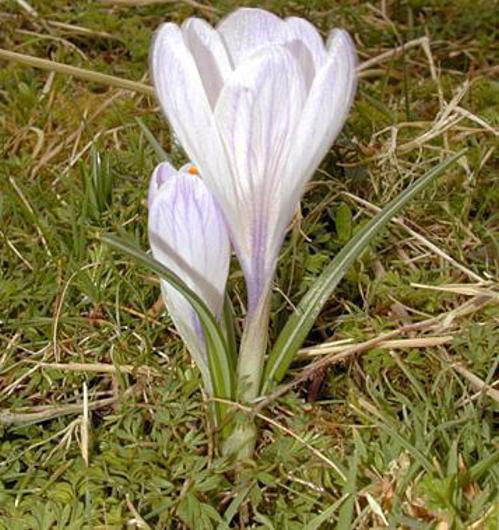

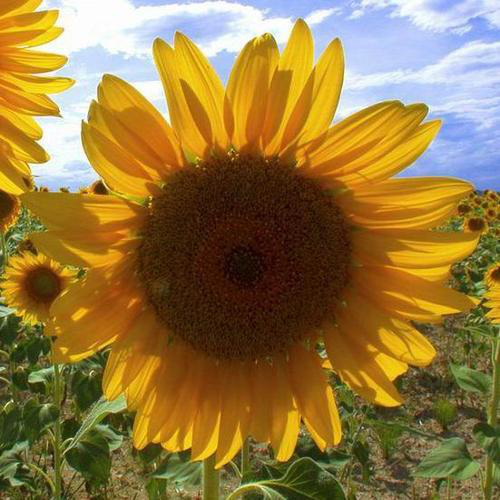

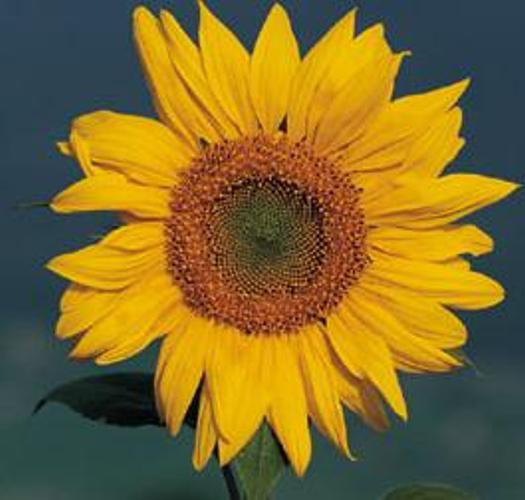

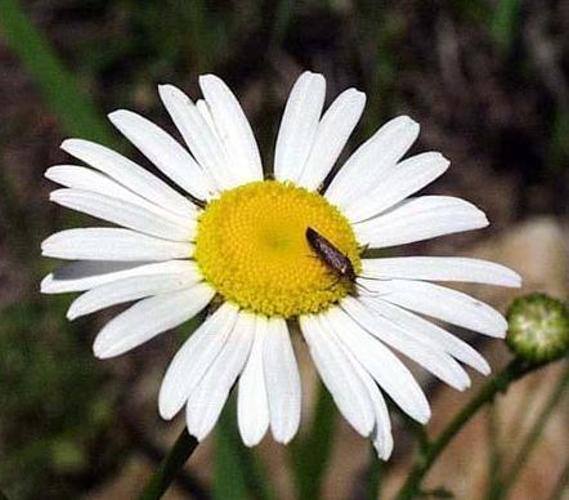

In [ ]:
# Specify the path to the zip file and the image folder within it
zip_file_path = '/content/dataset.zip'  # Replace with your zip file path
image_folder_path = '/content/extracted_folder/dataset/images'  # Replace with the image folder path inside the zip
mask_folder_path = '/content/extracted_folder/dataset/masks'  # Replace with the image folder path inside the zip

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('extracted_folder')  # Extract to a folder named 'extracted_folder'

image_count = 0
for filename in os.listdir(os.path.join('extracted_folder', image_folder_path)):
    if filename.endswith(('.jpg', '.jpeg', '.png', '.gif')):  # Check for common image extensions
        image_path = os.path.join('extracted_folder', image_folder_path, filename)
        display(Image(filename=image_path))
        image_count += 1
        if image_count == 10:
            break

# **Visualizing the masks in the folder to know how to implement and apply them on the images**

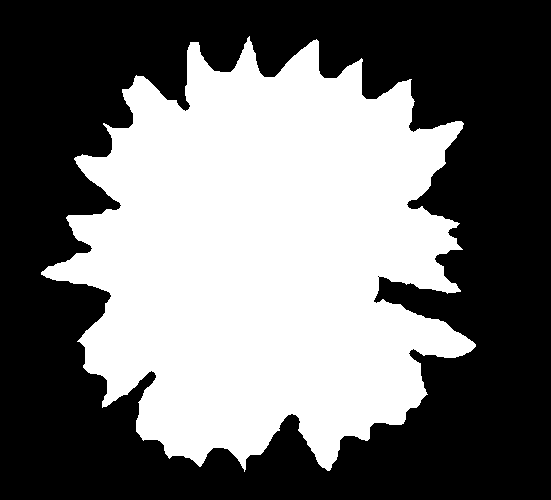

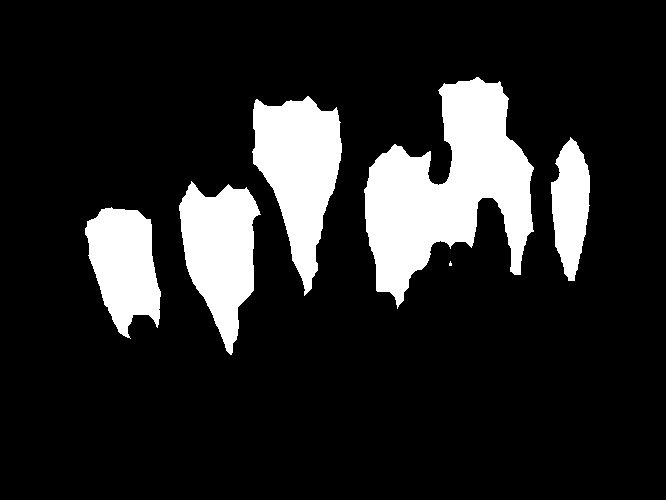

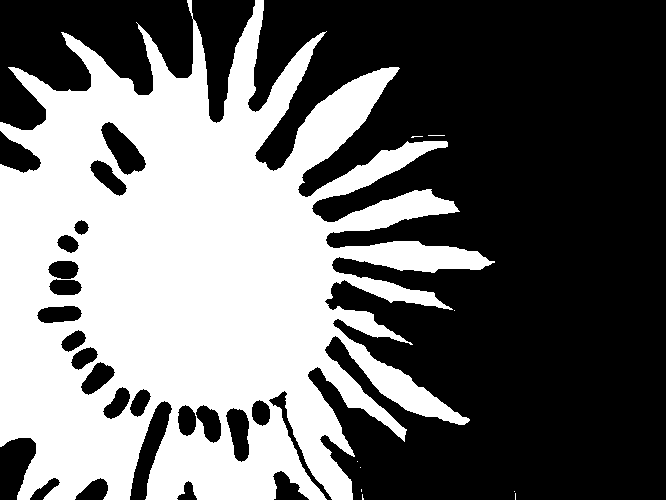

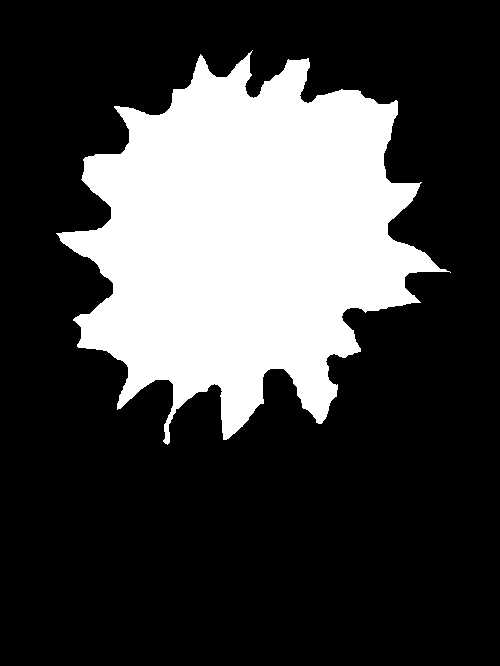

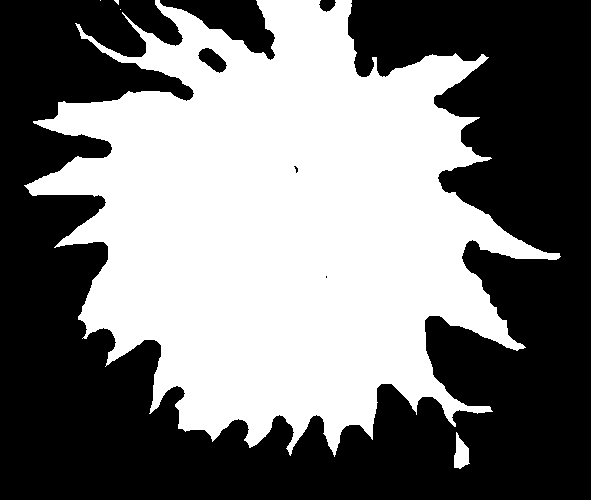

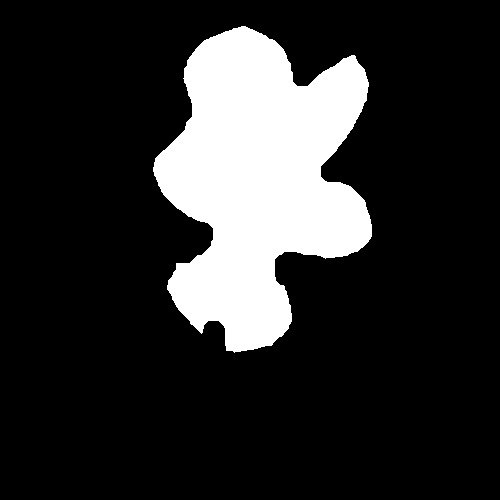

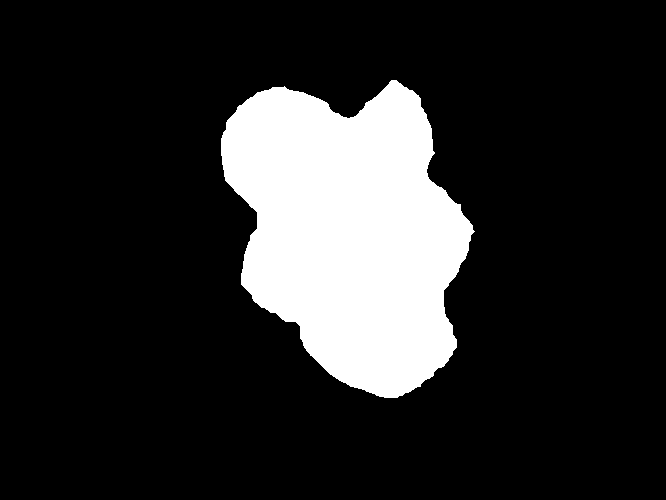

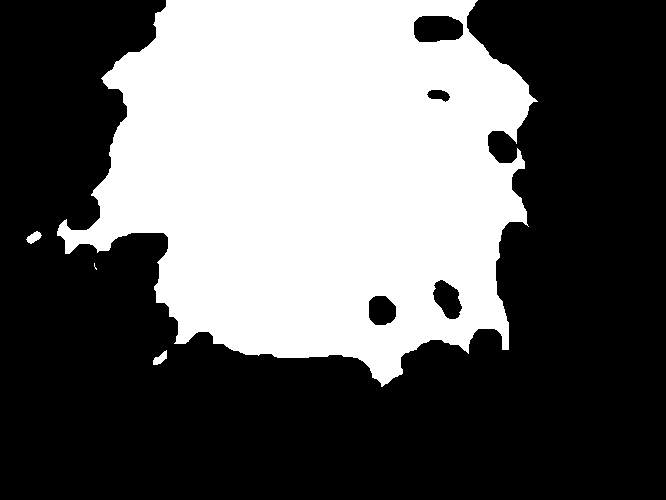

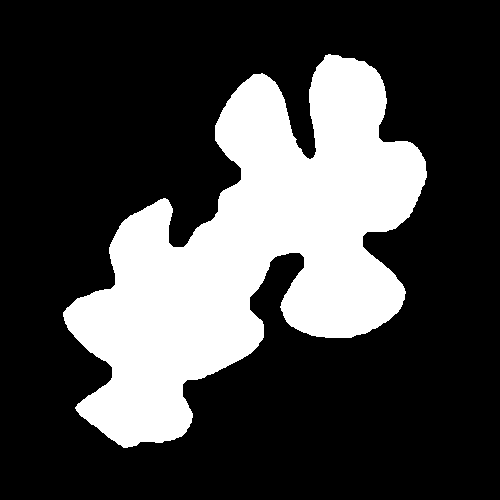

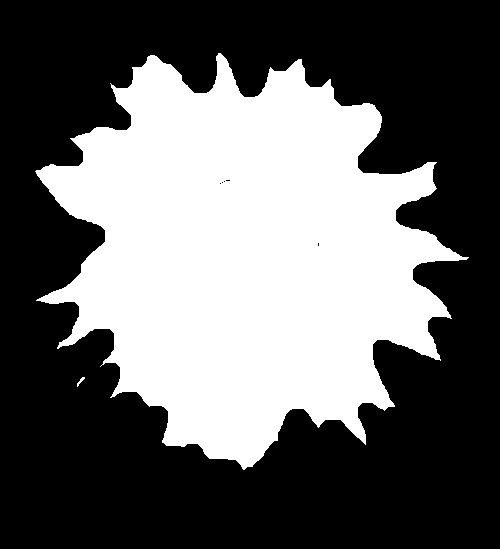

In [ ]:
image_count = 0
for filename in os.listdir(os.path.join('extracted_folder', mask_folder_path)):
    if filename.endswith(('.jpg', '.jpeg', '.png', '.gif')):  # Check for common image extensions
        mask_path = os.path.join('extracted_folder', mask_folder_path, filename)
        display(Image(filename=mask_path))
        image_count += 1
        if image_count == 10:
            break

# **Applying all the extracted masks to the images to elminate other features which might get extracted. It is being applied on the basis of the file names.**

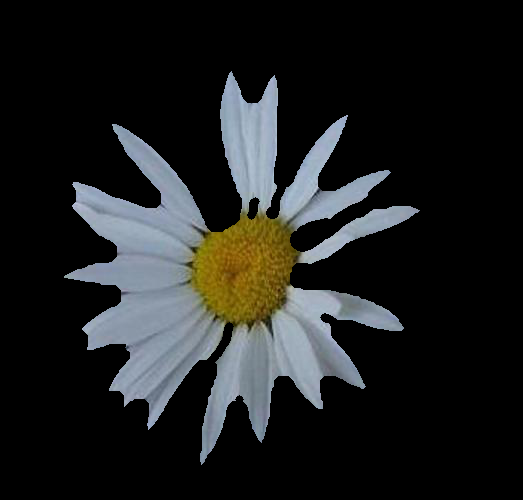

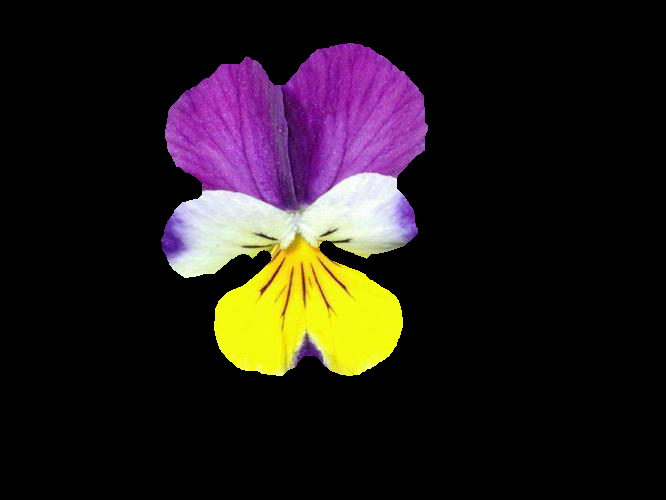

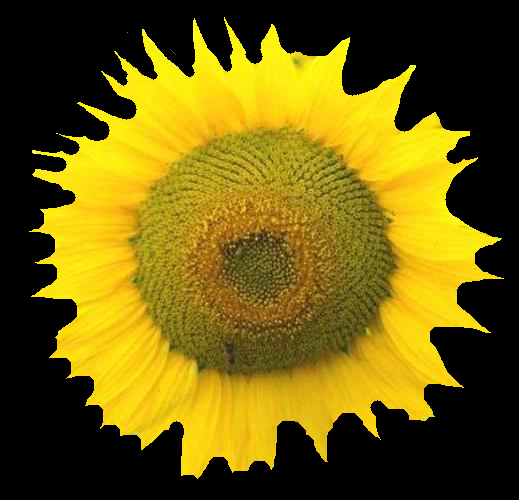

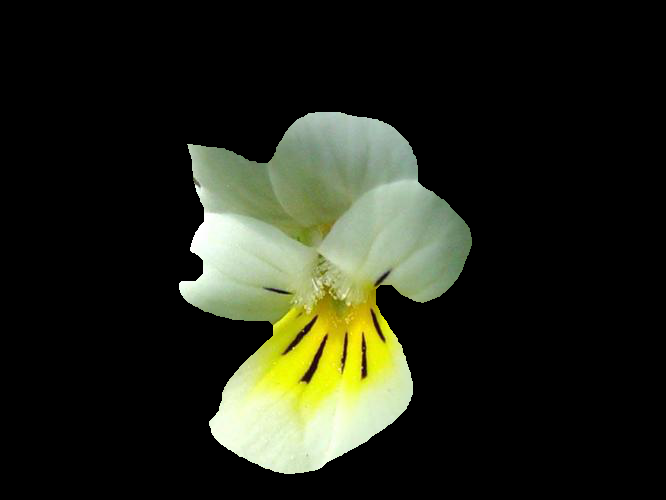

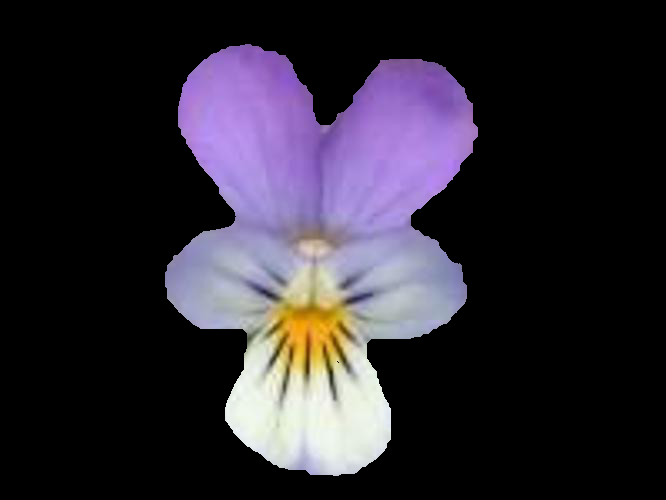

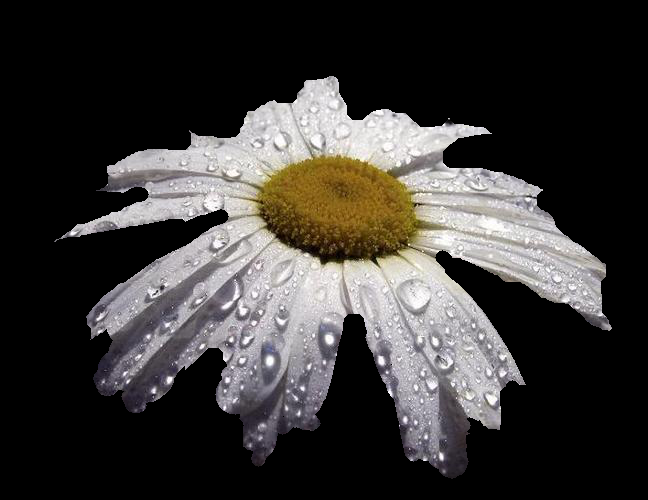

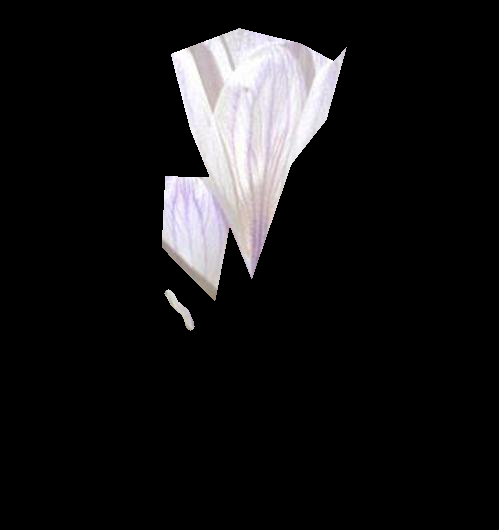

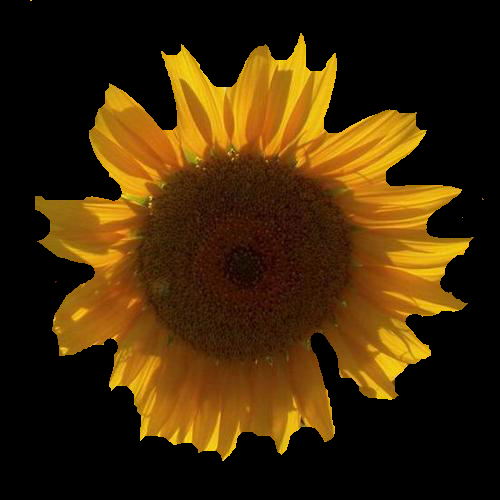

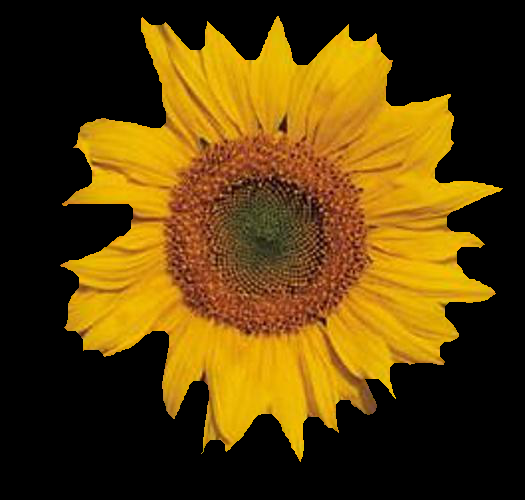

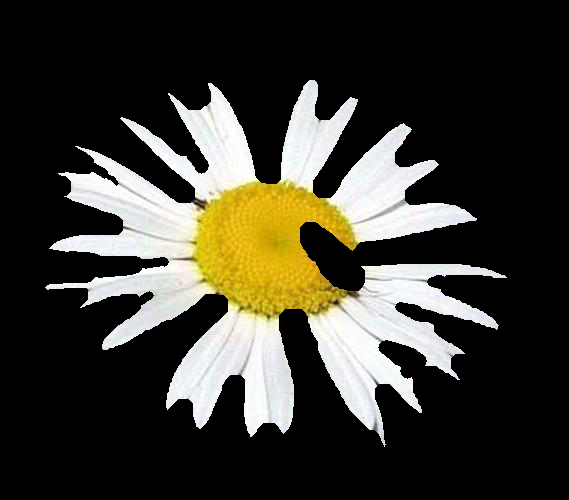

Masked images saved to: /content/masked_images


In [ ]:
image_folder_path = '/content/extracted_folder/dataset/images'
mask_folder_path = '/content/extracted_folder/dataset/masks'
output_folder_path = '/content/masked_images'  # New folder for masked images

os.makedirs(output_folder_path, exist_ok=True)  # Create output folder if it doesn't exist

image_count = 0
for image_filename in os.listdir(image_folder_path):
    if image_filename.endswith(('.jpg', '.jpeg', '.png', '.gif')):
        image_path = os.path.join(image_folder_path, image_filename)

        # Extract last 4 digits from image filename
        image_digits = re.findall(r'\d{4}', image_filename)[-1]

        # Find matching mask filename
        mask_filename = None
        for mask_file in os.listdir(mask_folder_path):
            if mask_file.endswith(('.jpg', '.jpeg', '.png', '.gif')) and image_digits in mask_file:
                mask_filename = mask_file
                break

        if mask_filename:
            mask_path = os.path.join(mask_folder_path, mask_filename)

            # Load image and mask using OpenCV
            image = cv2.imread(image_path)
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

            # Apply mask to image
            masked_image = cv2.bitwise_and(image, image, mask=mask)

            # Save masked image to output folder
            output_path = os.path.join(output_folder_path, image_filename)
            cv2.imwrite(output_path, masked_image)

            # Display the first 10 masked images
            if image_count < 10:
                display(Image(filename=output_path))
            image_count += 1

print(f"Masked images saved to: {output_folder_path}")

# **The target variable is being extracted from the file name to create a column of target variables and saved into a csv file .Which will help in training and testing of the models**

In [ ]:
def create_dataset(masked_image_folder):
    data = []
    for filename in os.listdir(masked_image_folder):
        if filename.endswith(('.jpg', '.jpeg', '.png', '.gif')):
            image_path = os.path.join(masked_image_folder, filename)

            # Extract target variable from filename
            if "crocus" in filename.lower():
                target = "crocus"
            elif "sunflower" in filename.lower():
                target = "sunflower"
            elif "pansy" in filename.lower():
                target = "pansy"
            elif "daisy" in filename.lower():
                target = "daisy"
            else:
                target = "unknown" # Or handle differently if needed

            data.append({'image': image_path, 'target': target})

    df = pd.DataFrame(data)
    return df

# Example usage
masked_image_folder = '/content/masked_images'  # Replace with the actual path
dataset = create_dataset(masked_image_folder)
print(dataset.head())
# Save to CSV (optional)
dataset.to_csv('image_dataset.csv', index=False)


                                             image     target
0      /content/masked_images/image_daisy_0147.png      daisy
1      /content/masked_images/image_pansy_0227.png      pansy
2  /content/masked_images/image_sunflower_0067.png  sunflower
3      /content/masked_images/image_pansy_0209.png      pansy
4      /content/masked_images/image_pansy_0231.png      pansy


# **Creating a MLP model after encoding the labels to numerical values(0,1,2,3). Then trained the model and tested the model.And printed the predicted and real values with images to visualize them**

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.4714 - loss: 1.2689 - val_accuracy: 0.6857 - val_loss: 1.0331
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6219 - loss: 0.8273 - val_accuracy: 0.8571 - val_loss: 0.6704
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8106 - loss: 0.5705 - val_accuracy: 0.8000 - val_loss: 0.5579
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8284 - loss: 0.3739 - val_accuracy: 0.8571 - val_loss: 0.4034
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9331 - loss: 0.2884 - val_accuracy: 0.8857 - val_loss: 0.3731
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9409 - loss: 0.2122 - val_accuracy: 0.8857 - val_loss: 0.3672
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9707 - loss: 0.1423 - val_accuracy: 0.8571 - val_loss: 0.3302
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9544 - loss: 0.1139 - val_accuracy: 0.8857 - val_loss: 0.2559
Epoch 9/20


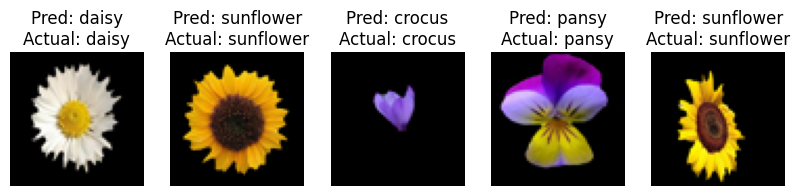

In [ ]:
from PIL import Image

# Load the dataset
try:
    df = pd.read_csv('image_dataset.csv')
except FileNotFoundError:
    print("Error: 'image_dataset.csv' not found.")
    exit()

# Encode target labels
le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])  # Convert categorical labels to numbers
image_paths = df['image'].values
targets = df['target'].values

# Function to load and preprocess images
def preprocess_image(image_path):
    try:
        img = Image.open(image_path)
        img = img.resize((64, 64))  # Resize images
        img = np.array(img) / 255.0  # Normalize pixel values
        return img
    except FileNotFoundError:
        print(f"Warning: Image file not found: {image_path}")
        return None

# Load all images
images = [preprocess_image(path) for path in image_paths]

# Remove None values (missing images)
images = np.array([img for img in images if img is not None])
targets = np.array([target for i, target in enumerate(targets) if images[i] is not None])

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(images, targets, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# One-hot encode the target variables
num_classes = len(np.unique(targets))
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Define the Multi-Layer Perceptron (MLP) model
model = Sequential([
  Flatten(input_shape=(64, 64, 3)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(num_classes, activation='softmax') # 4 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, verbose=1, validation_data=(X_val, y_val))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Predict on test images
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)  # Convert one-hot to class labels
actual_labels = np.argmax(y_test, axis=1)

# Map numeric labels back to original categories
label_map = {i: label for i, label in enumerate(le.classes_)}

# Plot some test images with predicted & actual labels
num_images_to_show = 5
plt.figure(figsize=(10, 5))

for i in range(num_images_to_show):
    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(X_test[i])
    plt.axis("off")
    plt.title(f"Pred: {label_map[predicted_labels[i]]}\nActual: {label_map[actual_labels[i]]}")

plt.show()

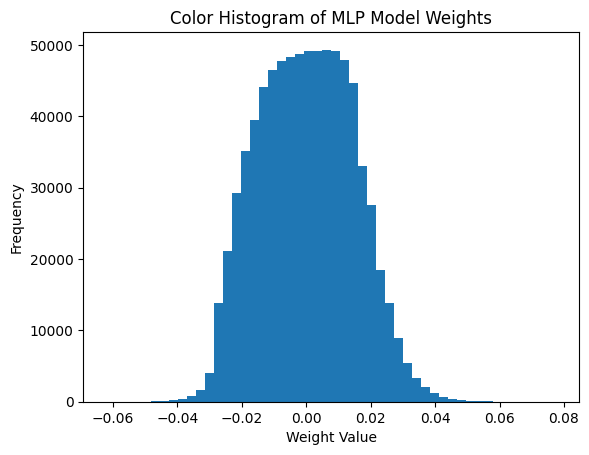

In [ ]:
#get the weights of first layer
weights = model.layers[1].get_weights()[0]

# Flatten the weights into a 1D array
weights_flat = weights.flatten()

# Create a histogram of the weight values
plt.hist(weights_flat, bins=50)
plt.xlabel("Weight Value")
plt.ylabel("Frequency")
plt.title("Color Histogram of MLP Model Weights")
plt.show()


In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 12288)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │         786,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,367,518 (9.03 MB)

 Trainable params: 789,172 (3.01 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,578,346 (6.02 MB)

# **Created a CNN model With the same train,test and validation size only to ensure uniformity among the models. And after training printed some examples of predicted and real values.**

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 246ms/step - accuracy: 0.2934 - loss: 1.4956 - val_accuracy: 0.6286 - val_loss: 0.9327
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - accuracy: 0.7099 - loss: 0.7421 - val_accuracy: 0.6857 - val_loss: 0.6247
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step - accuracy: 0.8851 - loss: 0.3813 - val_accuracy: 0.8571 - val_loss: 0.3443
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - accuracy: 0.9656 - loss: 0.1657 - val_accuracy: 0.9429 - val_loss: 0.1833
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - accuracy: 0.9936 - loss: 0.0924 - val_accuracy: 0.9143 - val_loss: 0.2576
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - accuracy: 0.9870 - loss: 0.0703 - val_accuracy: 0.8857 - val_loss: 0.2910
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - accuracy: 0.9093 - loss: 0.2001 - val_accuracy: 0.8857 - val_loss: 0.4012
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - accuracy: 0.9299 - loss: 0.1575 - val_accuracy: 0.8857 - val_loss: 0.2906
Epo

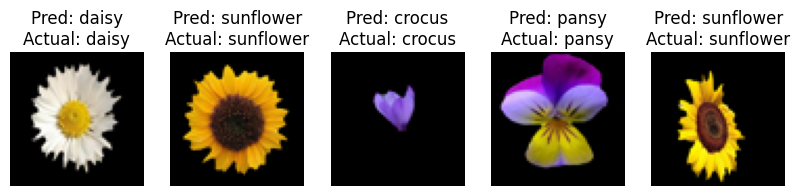

In [ ]:
# Define the CNN model
cnnmodel = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
cnnmodel.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
cnnmodel.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model
loss, accuracy = cnnmodel.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Predict on test images
predictions = cnnmodel.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
actual_labels = np.argmax(y_test, axis=1)

# Plot some example predictions
label_map = {i: label for i, label in enumerate(le.classes_)}
num_images_to_show = 5
plt.figure(figsize=(10, 5))
for i in range(num_images_to_show):
    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(X_test[i])
    plt.axis("off")
    plt.title(f"Pred: {label_map[predicted_labels[i]]}\nActual: {label_map[actual_labels[i]]}")
plt.show()


In [ ]:
cnnmodel.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,877,006 (18.60 MB)

 Trainable params: 1,625,668 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,251,338 (12.40 MB)

# **EXPERIMENTAL RESULTS**

# **Comparing Accuracy,Test Loss,time taken and no of parameters of MLP and CNN models.**

In [ ]:
# Evaluate the MLP model
mlp_loss, mlp_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"MLP Test Loss: {mlp_loss:.4f}")
print(f"MLP Test Accuracy: {mlp_accuracy:.4f}")


# Evaluate the CNN model
cnn_loss, cnn_accuracy = cnnmodel.evaluate(X_test, y_test, verbose=0)
print(f"CNN Test Loss: {cnn_loss:.4f}")
print(f"CNN Test Accuracy: {cnn_accuracy:.4f}")

# Compare performance
print("\nPerformance Comparison:")
print(f"MLP Accuracy: {mlp_accuracy:.4f}")
print(f"CNN Accuracy: {cnn_accuracy:.4f}")

if mlp_accuracy > cnn_accuracy:
    print("MLP outperforms CNN in terms of accuracy.")
elif cnn_accuracy > mlp_accuracy:
    print("CNN outperforms MLP in terms of accuracy.")
else:
    print("MLP and CNN have similar accuracy.")

start_time_mlp = time.time()
model.fit(X_train, y_train, epochs=20, verbose=0, validation_data=(X_val, y_val))
mlp_training_time = time.time() - start_time_mlp

start_time_cnn = time.time()
cnnmodel.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0, validation_data=(X_val, y_val))
cnn_training_time = time.time() - start_time_cnn

print("\nTraining Time Comparison:")
print(f"MLP Training Time: {mlp_training_time:.2f} seconds")
print(f"CNN Training Time: {cnn_training_time:.2f} seconds")


# Model size comparison
mlp_num_params = model.count_params()
cnn_num_params = cnnmodel.count_params()

print("\nModel Size Comparison:")
print(f"MLP Number of Parameters: {mlp_num_params}")
print(f"CNN Number of Parameters: {cnn_num_params}")

MLP Test Loss: 0.3063
MLP Test Accuracy: 0.8889
CNN Test Loss: 0.1341
CNN Test Accuracy: 0.9167

Performance Comparison:
MLP Accuracy: 0.8889
CNN Accuracy: 0.9167
CNN outperforms MLP in terms of accuracy.

Training Time Comparison:
MLP Training Time: 5.24 seconds
CNN Training Time: 23.98 seconds

Model Size Comparison:
MLP Number of Parameters: 789172
CNN Number of Parameters: 1625668


# **CONCLUSION**

This assignment compared MLP and CNN models for image classification. The CNN model demonstrated superior performance due to its ability to capture spatial features effectively. The evaluation highlighted the trade-offs in accuracy, computational efficiency, and complexity. These insights reinforce the advantages of deep learning architectures in handling image-based tasks.

\

**LINK OF ORIGINAL NOTEBOOK :** https://colab.research.google.com/drive/1nbPqImdm_rrw4crigmEIV5enSKcA5289?usp=sharing